# Bonus

🎯 You are a Data Scientist for a bank. You are asked to develop a model that is able to detect at least 90% of fraudlent transactions. Go!

👇 Load the player `creditcard.csv` dataset and display its first 5 rows.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../data/creditcard.csv")

In [5]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

ℹ️ Due to confidentiality issues, the original features have been preprocessed and renamed `V1` to `V28`. There are two features which have not been transformed: `Time` and `Amount`. Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature `Amount` is the transaction Amount. `Class` is the target and it takes value 1 in case of fraud and 0 otherwise.

# Base Logistic Regression

👇 Check class balance.

In [36]:
data.Class.value_counts()

0    28432
1       49
Name: Class, dtype: int64

👇 Evaluate a Base logistic regression for Recall. Use model parameter `class_weight = 'balanced'` to ensure it deals with class imbalance.

In [7]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

# Ready X and y
X = data.loc[:, 'V1':'Amount']
y = data['Class']

scaler = RobustScaler()

X_scaled = scaler.fit_transform(X)


# 10-Fold Cross validate model
log_cv_results = cross_validate(LogisticRegression(max_iter=1000, class_weight = 'balanced' ), X_scaled, y, cv=10, 
                            scoring=['recall'])

log_cv_results['test_recall'].mean()

0.8800000000000001

ℹ️ A default Logistic Regression model can't guarantee a 90% recall. Its decision threshold needs to be adjusted to reach such a score.

# Threshold adjustment

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

# Predict probabilities
y_pred_probas_0, y_pred_probas_1 = cross_val_predict(LogisticRegression(max_iter=1000,class_weight = 'balanced'),
                                                     X_scaled,y,
                                                     method = "predict_proba").T

# Generate precision and thresholds (and recalls) using probabilities for class 1

precision, recall, thresholds = precision_recall_curve(y, y_pred_probas_1)

In [15]:
scores = pd.DataFrame({'threshold': thresholds,
                       'precision': precision[:-1],
                       'recall': recall[:-1]})# Store in dataframe

Text(0.5, 0, 'recall')

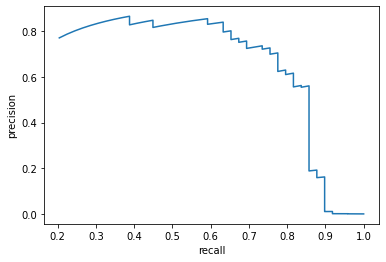

In [16]:
plt.plot(scores['recall'],scores['precision'])
plt.ylabel('precision')
plt.xlabel('recall')

In [38]:
# Populate dataframe with precision and threshold
df_recall = pd.DataFrame({"recall" : recall[:-1], "threshold" : thresholds})

# Find out which threshold guarantees a recall of 0.9
new_threshold = df_recall[df_recall['recall'] >= 0.9]['threshold'].max()

new_threshold

0.0005352674745796255

ℹ️ The decision threshold that guarantees a 90% recall is 0.0005.